Estudo sobre os Acidentes de Trânsito em BRs no estado da Paraíba

In [90]:
# Importando o Pandas, o Dataset, o Seaborn, CSV pra ler o Dataset, e o Numpy. -- EM.
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression


dataset = pd.read_csv("https://raw.githubusercontent.com/EmanuelMMB/Projeto-ICD/main/datatranPB.csv", sep =";")

Dataset com todos os tipos de dados

In [91]:
dataset.head()

,Nome da Origem,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,uso_solo,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,datatran2013.csv,1228868,01/01/2013,Terça,00:15:00,PB,101,929,JOAO PESSOA,Outras,...,Urbano,2013.0,1,0,0,0,1,0,0,1
1,datatran2013.csv,1228898,01/01/2013,Terça,03:30:00,PB,230,2341,JUAZEIRINHO,Ingestão de álcool,...,Rural,2013.0,1,0,0,1,0,0,1,1
2,datatran2013.csv,1228977,01/01/2013,Terça,08:20:00,PB,101,89,JOAO PESSOA,Outras,...,Urbano,2013.0,1,0,0,0,1,0,0,1
3,datatran2013.csv,1229043,01/01/2013,Terça,02:45:00,PB,230,74,CABEDELO,Falta de atenção,...,Urbano,2013.0,2,0,0,0,2,0,0,2
4,datatran2013.csv,1229088,01/01/2013,Terça,07:20:00,PB,230,245,JOAO PESSOA,Outras,...,Urbano,2013.0,2,1,0,1,0,0,1,1


Dados organizados para melhor visualização.

In [92]:
dataset = dataset.drop(["id", "horario", "uf", "Nome da Origem", "br", "municipio", "ignorados"], axis=1)

dataset['causa_acidente'] = dataset['causa_acidente'].apply(
    lambda x: 'Falta de Atenção' if 'falta de atenção' in x.lower() else
              'Velocidade Incompatível' if 'velocidade incompatível' in x.lower() else
              'Dormindo' if 'dormindo' in x.lower() else
              'Ingestão de Álcool' if 'ingestão de álcool' in x.lower() else
              'Defeito na Via' if 'defeito na via' in x.lower() else
              'Ultrapassagem Indevida' if 'ultrapassagem indevida' in x.lower() else
              'Não guardar distância de segurança' if 'condutor deixou de manter distância do veículo da frente' in x.lower() else x
)
#Arrumando os dados para melhor visualizar. -- EM.

contagem = dataset['causa_acidente'].value_counts() #Será necessário mais a frente. -- EM.

dataset = dataset[dataset['feridos'] < 10]
#Remoção de uma entrada incomum.

dataset.describe()

,km,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,feridos,veiculos
count,23105.000000,10645.000000,23105.000000,23105.000000,23105.000000,23105.000000,23105.000000,23105.000000,23105.000000
mean,366.027353,2013.860592,2.231335,0.066133,0.613201,0.250941,1.099805,0.864142,1.782644
std,750.119802,0.798175,1.388774,0.285025,0.840412,0.551182,1.298536,0.959772,0.851165
min,0.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,36.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,117.000000,2014.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,313.000000,2015.000000,3.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000
max,5226.000000,2015.000000,50.000000,7.000000,9.000000,7.000000,49.000000,9.000000,14.000000


Frequência de feridos e mortos, na maioria dos acidentes, ninguém morre.

<Axes: >

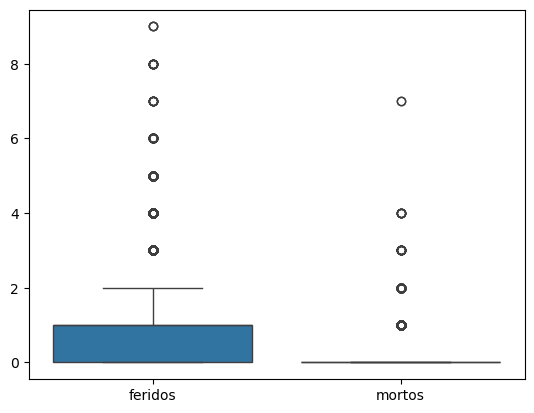

In [93]:
sns.boxplot(data=dataset[["feridos","mortos"]])

In [94]:
dataset[["feridos", "mortos"]].corr()

,feridos,mortos
feridos,1.000000,-0.029177
mortos,-0.029177,1.000000


In [95]:
dataset[["ilesos", "mortos"]].corr()

,ilesos,mortos
ilesos,1.000000,-0.072447
mortos,-0.072447,1.000000


Seção de Visualização: Histograma, Gráfico de Dispersão e Gráfico de Barra/Linha.

<Axes: ylabel='Count'>

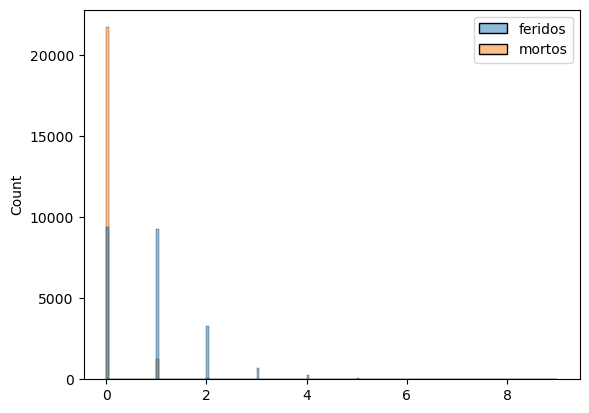

In [96]:
sns.histplot(data=dataset[["feridos", "mortos"]])
#Frequencia de feridos e mortos por acidente.
#Na maioria dos acidentes, ninguém se fere ou morre. -- EM.

<Axes: xlabel='veiculos', ylabel='feridos'>

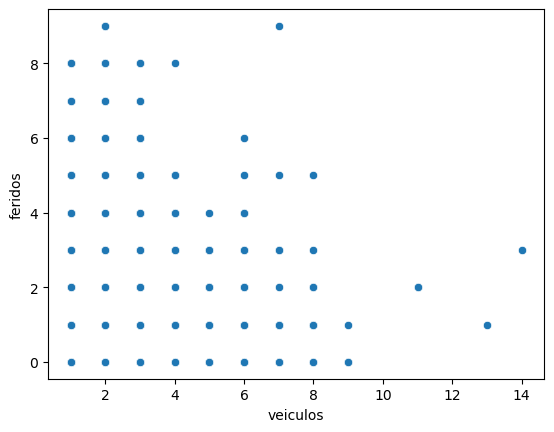

In [97]:
sns.scatterplot(x='veiculos', y='feridos', data=dataset)
#Vendo se há alguma relação entre a quantidade de veículos envolvidos e a quantidade de feridos.


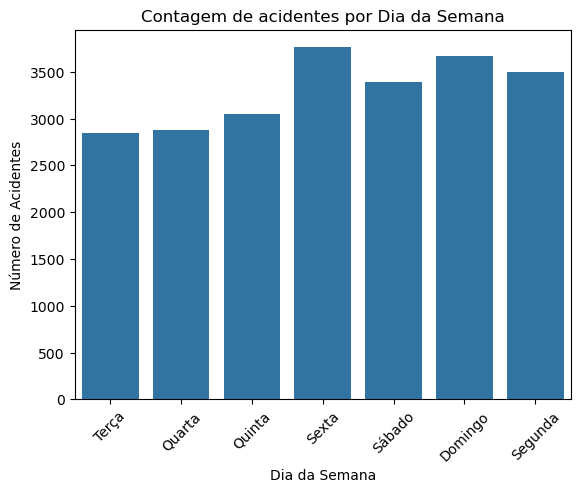

In [98]:
sns.countplot(x='dia_semana', data=dataset)

plt.title('Contagem de acidentes por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Acidentes')

plt.xticks(rotation=45)
plt.show()

#Qual dia da semana tem mais acidentes.

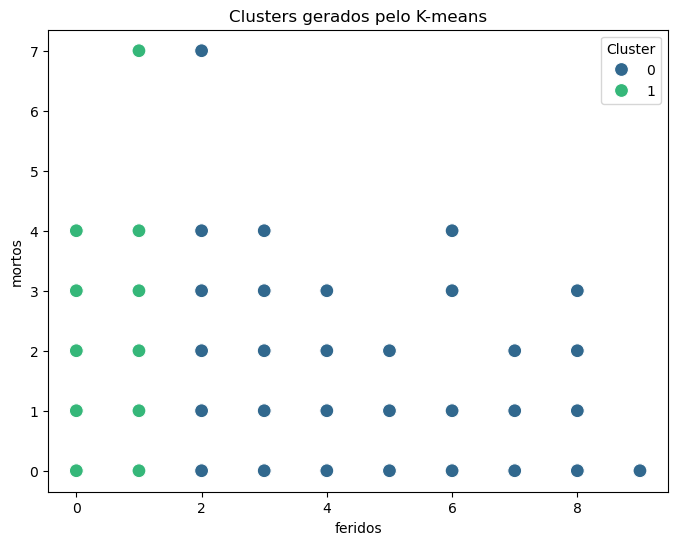

In [99]:
#Testando K-Means.

kmeans = KMeans(n_clusters=2, random_state=42)
x=dataset[["feridos", "mortos"]].values
kmeans.fit(x)

labels = kmeans.labels_

dataset['Cluster'] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(x='feridos', y='mortos', hue='Cluster', data=dataset, palette='viridis', s=100)
plt.title('Clusters gerados pelo K-means')
plt.show()

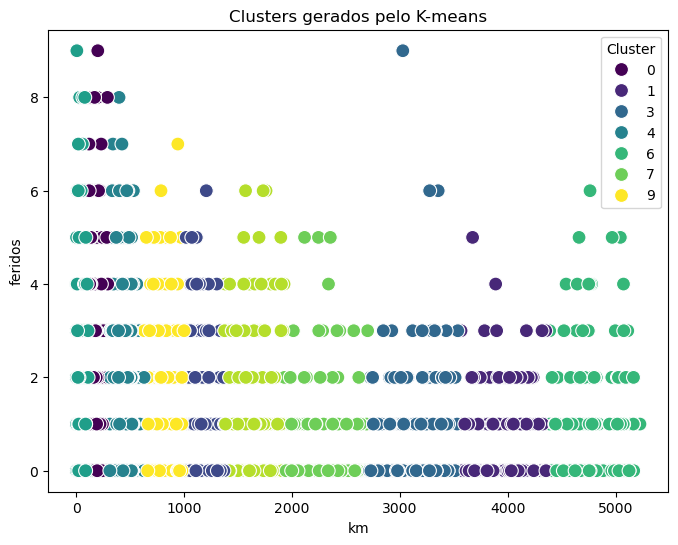

In [100]:
kmeans = KMeans(n_clusters=10, random_state=42)
x=dataset[["km", "feridos"]].values
kmeans.fit(x)

labels = kmeans.labels_

dataset['Cluster'] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(x='km', y='feridos', hue='Cluster', data=dataset, palette='viridis', s=100)
plt.title('Clusters gerados pelo K-means')
plt.show()

Coeficiente angular (inclinação): 0.010203227252020145
Intercepto: -20.4985583432255


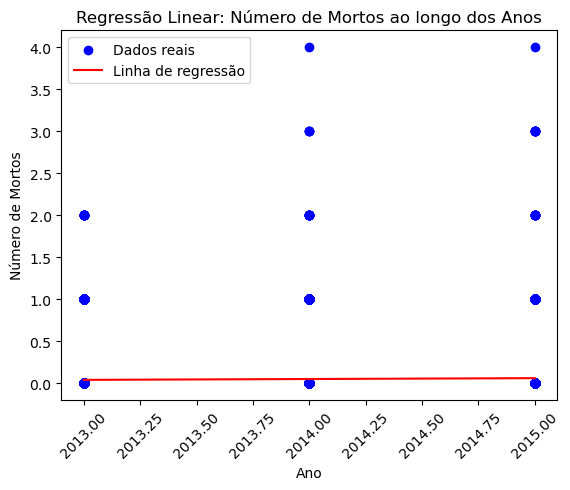

R²: 0.0011080610225666643


In [101]:
#tentativa de regressão linear.
dataset = dataset.dropna()

x = dataset[['ano']]
y = dataset['mortos']

modelo = LinearRegression()
modelo.fit(x, y)
print(f"Coeficiente angular (inclinação): {modelo.coef_[0]}")
print(f"Intercepto: {modelo.intercept_}")
y_pred = modelo.predict(x)

plt.scatter(x, y, color='blue', label='Dados reais')
plt.plot(x, y_pred, color='red', label='Linha de regressão')
plt.xticks(rotation=45)
plt.xlabel('Ano')
plt.ylabel('Número de Mortos')
plt.title('Regressão Linear: Número de Mortos ao longo dos Anos')
plt.legend()
plt.show()

r_squared = modelo.score(x, y)
print(f"R²: {r_squared}")